## Check this original data form

In [ ]:
import json
import gzip

path = "/home/azureuser/cloudfiles/code/Users/jinlong.pang/docta/data/hh-rlhf/harmless-base/test.jsonl.gz"

all_data = []
invalid_lines = 0

with gzip.open(path, 'rt', encoding='utf-8') as f:
    for line in f:
        line = line.strip()  # 去除行首尾的空白字符
        if not line:
            continue  # 跳过空行

        try:
            data = json.loads(line)
            all_data.append(data)
            print(data) 
        except json.JSONDecodeError as e:
            print(f"Invalid JSON line: {line}")
            invalid_lines += 1

print(f"Total invalid lines skipped: {invalid_lines}")
print(f"Total valid lines processed: {len(all_data)}")


# Check the Tulu data form

In [ ]:
from datasets import load_dataset


data = load_dataset("allenai/tulu-v2-sft-mixture")

In [ ]:
data['train'][0]

In [13]:
import torch
from collections import Counter
import  matplotlib.pyplot as plt
import os

##full dataset
# dataset_list = ['wizardlm', 'lima', 'flan_v2', 'code_alpaca', 'cot', 'oasst1', 'open_orca', 'science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded', 'sharegpt'] #, 'sharegpt'

# dataset_list = ['wizardlm', 'lima', 'flan_v2', 'cot', 'oasst1', 'open_orca', 'science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded', 'sharegpt'] #, 'sharegpt'

# dataset_list = ['science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded'] #, 'sharegpt'
# dataset_list=['cot', 'flan_v2', 'wizardlm']
dataset_list=['flan_v2']

# model_name="meta/llama-3.1-8b-instruct"
model_name='google/gemma-2-9b-it'



for dataset_name in dataset_list:
    # dataset_name = 'flan_v2'
    path = f"./data/{model_name}/{dataset_name}/"
    orginal_data_path = f"./logs-api/{model_name}/{dataset_name}/"

    if not os.path.exists(path):
        os.makedirs(path)

    original_labels = torch.load(orginal_data_path +'total_output_labels.pt')
    label_counts = Counter(original_labels)
    print(f"Dataset {dataset_name}: {label_counts}")

Dataset flan_v2: Counter({4: 25861, 3: 14717, 2: 5575, 1: 1140, 0: 1056, 5: 719, None: 37, -1: 18})


In [6]:
import os
import torch
from collections import Counter

# 定义数据集列表
DATASET_LIST = [
    'flan_v2', 'cot', 'oasst1', 'lima', 'gpt4_alpaca', 'code_alpaca',
    'sharegpt', 'wizardlm', 'open_orca', 'science.evidence_inference',
    'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic',
    'science.scierc_ner', 'science.scierc_relation', 'hard_coded'
]

# 定义主目录路径
base_dir = './zzzz-test/output/meta-llama/Meta-Llama-3.1-8B-Instruct/'

# 用于保存所有数据的列表
all_labels = []

# 遍历每个数据集
for dataset in DATASET_LIST:
    labels_path = os.path.join(base_dir, dataset, 'output_labels.pt')
    
    if os.path.exists(labels_path):
        # 加载并扩展文件内容
        labels = torch.load(labels_path)
        all_labels.extend(labels)
        label_counts = Counter(all_labels)
        print(f"dataset: {dataset}: {label_counts}")


    else:
        print(f"未找到 {labels_path}")

# 打印或处理汇总后的标签数据
print(f"总共加载了 {len(all_labels)} 个标签。")

# 如果你想保存合并后的标签到一个新文件
output_file = os.path.join(base_dir, 'all_output_labels.pt')
torch.save(all_labels, output_file)


label_counts = Counter(all_labels)
print(f"Dataset TULU: {label_counts}")



总共加载了 326154 个标签。
Dataset TULU: Counter({5: 179080, 4: 60095, 3: 33984, 1: 25314, 2: 24678, -1: 2862, 0: 141})


## 1. Check the labels from LLMs and adjust the labels 

Dataset flan_v2: Counter({5: 14378, 3: 10693, 4: 9011, 2: 7392, 1: 5625, -1: 1921, 0: 103})
Dataset flan_v2: Revised Counter({5: 14378, 3: 10693, 4: 9011, 2: 7392, 1: 5625, 0: 2024}) 



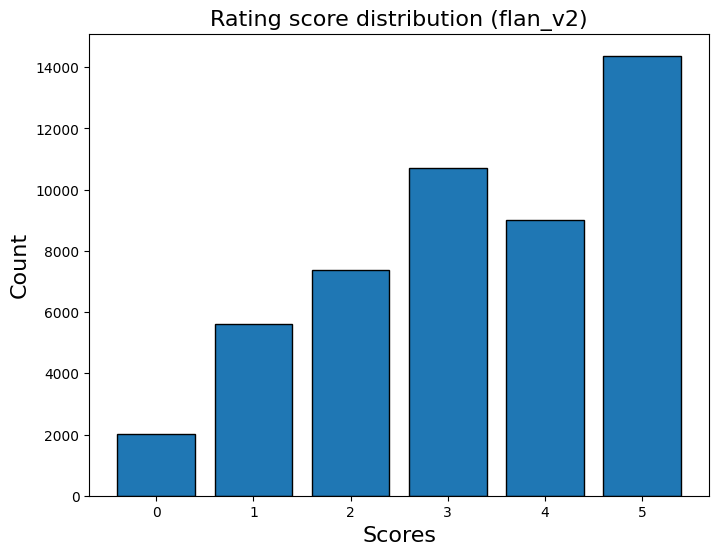

In [23]:
import torch
from collections import Counter
import  matplotlib.pyplot as plt
import os

##full dataset
# dataset_list = ['wizardlm', 'lima', 'flan_v2', 'code_alpaca', 'cot', 'oasst1', 'open_orca', 'science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded', 'sharegpt'] #, 'sharegpt'

# dataset_list = ['wizardlm', 'lima', 'flan_v2', 'cot', 'oasst1', 'open_orca', 'science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded', 'sharegpt'] #, 'sharegpt'

# dataset_list = ['science.evidence_inference', 'science.qasper_truncated_4000', 'science.scifact_json', 'science.scitldr_aic', 'science.scierc_ner', 'science.scierc_relation' ,'hard_coded'] #, 'sharegpt'
# dataset_list=['cot', 'flan_v2', 'wizardlm']
dataset_list=['flan_v2']

model_name="meta/llama-3.1-8b-instruct"
# model_name='google/gemma-2-9b-it'
# model_name= "mistralai/mixtral-8x22b-instruct-v0.1"



for dataset_name in dataset_list:
    # dataset_name = 'flan_v2'
    path = f"./data/{model_name}/{dataset_name}/"
    orginal_data_path = f"./logs-api/{model_name}/{dataset_name}/"

    if not os.path.exists(path):
        os.makedirs(path)

    # original_labels = torch.load(orginal_data_path +'total_output_labels_best.pt')
    original_labels = torch.load(orginal_data_path +'total_output_labels_best.pt')

    label_counts = Counter(original_labels)
    print(f"Dataset {dataset_name}: {label_counts}")


    labels_revised = []
    for label in original_labels:
        if label == None or label == -1 or label > 5:
            labels_revised.append(0)
        else:
            labels_revised.append(label)

    label_counts_revised = Counter(labels_revised)
    print(f"Dataset {dataset_name}: Revised {label_counts_revised} \n")

    torch.save(labels_revised, path + "output_labels_revised.pt")

    # plt.figure(figsize=(8, 6))
    # keys = list(label_counts.keys())
    # values = list(label_counts.values())
    # plt.bar(keys, values, edgecolor='black')
    # plt.title(f'Labeling model: {model_name};  Labels Distribution for {dataset_name}')
    # plt.xlabel('Labels')
    # plt.ylabel('Count')
    # plt.xticks(keys)  # 设置x轴标签
    # plt.show()

    # 绘制修订标签的柱状图
    plt.figure(figsize=(8, 6))
    keys_revised = list(label_counts_revised.keys())
    values_revised = list(label_counts_revised.values())
    plt.bar(keys_revised, values_revised, edgecolor='black')
    # plt.title(f'Labeling model: {model_name}; Labels Distribution ({dataset_name})')
    plt.title(f'Rating score distribution ({dataset_name})', fontsize=16)

    plt.xlabel('Scores', fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.xticks(keys_revised)  # 设置x轴标签
    plt.show()

## 2. Check the labeling report

In [ ]:
### run the code and check the report

# bash diagnose_tulu.sh


In [39]:
import torch

reports = torch.load("score_curation/results/alignment_tulu/alignment_tulu_report.pt")

In [40]:
reports.detection.keys()
reports.curation.keys()

dict_keys(['label_curation', 'sampling_strategy', 'feature_curation'])

In [22]:
### report structure

{
    'names': {
        'diagnose': {
            'T': None, # square matrix
            'p_clean': None,  # row vector
            'p_org': None,  # row vector
            'class_distribution': None,  # histogram
            'group_distribution': None,  # histogram      
        },
        'detection': {
            'label_error': None, # (index, confidence)
            'coexistence': None, # (index, confidence)
            'rare_example': None, # (index, confidence)
        },
        'curation': {
            'label_curation':  None, # (index, suggested_label, confidence)
            'sampling_strategy': None, # (index, suggested_sample)
            'feature_curation': None, # (index, suggested_feature)      
        },
        'audition': {
            'model_perf': None, # (head_perf, tail_perf, overall_perf). 
            'fairness':  None, # (group_vec, performance_vec), disparity  
            'stress_test': None, # model_perf after distribution shift
        }
    }
}


### 2.1 Print Noise Transition Matrix

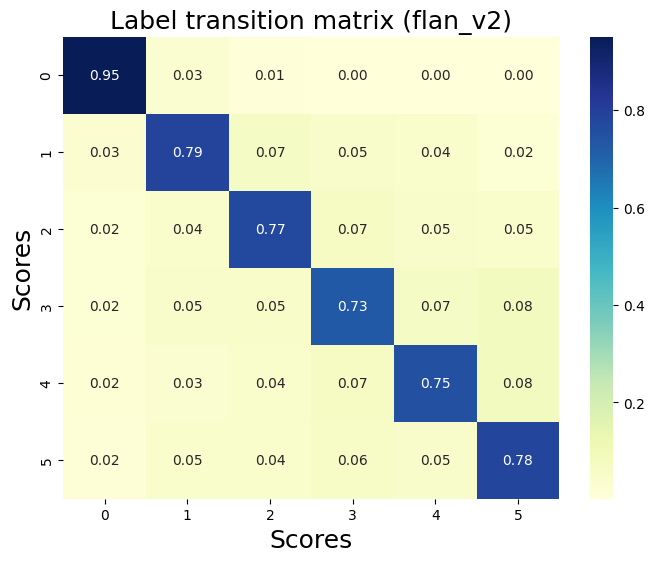

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"

report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"
reports = torch.load(report_path)


data= reports.diagnose['T']

# 设置图形大小
plt.figure(figsize=(8, 6))

# 使用 seaborn 绘制热力图
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")

# 添加标题和标签
# plt.title(f'Label transition matrix: {dataset_name}; Labeling model: {model_name}', fontsize=18)
plt.title(f'Label transition matrix ({dataset_name})', fontsize=18)
plt.xlabel('Scores', fontsize=18)
plt.ylabel('Scores', fontsize=18)

# 显示图形
plt.show()


# 3 Generate small-scale dataset

- Step 1: We first do label-wise samples and directly fiter out low-rated samples
- Step 2: calculate the long-tail score for the remaining samples# 3 Generate small-scale dataset

In [2]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.75: #confidence prob;0.75
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path = f"data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")

for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]
print(f"label size: {len(labels)}")

## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)

# 打印结果
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")
###filter out the low-quality samples

low_quality_label_idx = []
for idx, label in enumerate(labels):
    ####################### select labels  ########################
    if label<4: 
        low_quality_label_idx.append(idx)
    elif label == 3 and random.random() >= 0.5:
        low_quality_label_idx.append(idx)




label_wise_filter_out_samples = set(low_quality_label_idx + corrupted_samples_total)


print(f"label_wise_filter_out_samples: {len(label_wise_filter_out_samples)}")

'''Part-2 (feature-wise): handle the rare example'''

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")

long_tail_scores = np.array(rare_samples_filtered)[:,1]




bins = np.arange(0, max(long_tail_scores)+0.01, 0.01) # 定义区间边界

# 计算每个区间的计数
counts, _ = np.histogram(long_tail_scores, bins)


threshold = 530   ## the random threshold for feature-wise

remaining_samples_indices = []

for i in range(len(bins) - 1):
    indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
    
    if counts[i] > threshold:
        indices_in_bin = random.sample(list(indices_in_bin), threshold)
    
    remaining_samples_indices.extend(indices_in_bin)


remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]
remaining_samples_idx_1 = remaining_samples_idx
# long_tail_scores_filtered = long_tail_scores[remaining_samples_idx]
long_tail_scores_filtered = np.array(rare_samples_filtered)[remaining_samples_indices, 1]

# 打印剩余的样本及其原始索引
print("Size of the filtered dataset:", len(remaining_samples_idx))

'''filter out the corrupted samples and reconstruct the dataset'''

###the parquet data path
open_instruct_path = './data_refine/tulu_split_parquet/'

dataset_path = open_instruct_path + f"{dataset_name}.parquet"

data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(remaining_samples_idx)

filtered_labels = np.array(labels)[remaining_samples_idx].tolist()
torch.save(filtered_labels, root_path + "filtered_output_labels.pt")

assert len(filtered_dialogs) == len(filtered_labels)

# output_path = root_path + "data/flan_v2/filtered_flan_v2.parquet"
# filtered_dialogs.to_parquet(output_path)

output_json_path = root_path + f"filtered_dataset.json"  ## the json form is for funetunning
filtered_dialogs.to_json(output_json_path)

print(f"output_json_path: {output_json_path}")

###############################################
# random baseline
print("\n Start creating the random-select dataset!")
full_data_size = len(labels)
data_size = len(filtered_labels)




print(f"full data size: {full_data_size}; random selected size: {data_size}!!!")

random_samples_idx = random.sample(list(range(full_data_size)), data_size)

random_dialogs = data['train'].select(random_samples_idx)
output_json_path = root_path + f"random_dataset.json"  ## the json form is for funetunning
random_dialogs.to_json(output_json_path)



/home/azureuser/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


==== Docta: Doctor for your data. Current version: 0.2 ====
cured sample size: 1491
corrupted_samples_total: 9273
label size: 49123
Label: 0, Count: 577
Label: 1, Count: 5613
Label: 2, Count: 15986
Label: 3, Count: 15935
Label: 4, Count: 5926
Label: 5, Count: 5086
label_wise_filter_out_samples: 9273
Size of the remaining samples with high quality: 39850
Size of the filtered dataset: 6640


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 30.06ba/s]


output_json_path: data/meta/llama-3.1-8b-instruct/flan_v2/filtered_dataset.json

 Start creating the random-select dataset!
full data size: 49123; random selected size: 6640!!!


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 40.39ba/s]


16225980

# 3.* New method for generating small-scale dataset

- Findings: From the current experiments, we found that simply filter out low-rated samples will hurt the representation because the low-rated samples may be still rare.


New selection strategy is here: **first compare the long-tail distribution between selecting high-rated sample before and after to verify that the long-tail distribution is hurting by directly fiter out the low-rated samples**

- Step 1: directly generate a long-tail distribution
- Step 2: for each interval, rather than random filter out samples, we select the high-rated samples util reaching the threshold
- Step 3: based on this, we can further do some label curation on this, which serves as one incremental technique.


In [9]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.75: #confidence prob;0.75
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path = f"data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")

for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]
print(f"label size: {len(labels)}")

## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)

# 打印结果
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")
###filter out the low-quality samples

low_quality_label_idx = []
# for idx, label in enumerate(labels):
#     ######################## select labels  ########################
#     if label<4: 
#         low_quality_label_idx.append(idx)
#     # elif label == 3 and random.random() >= 0.5:
#     #     low_quality_label_idx.append(idx)




label_wise_filter_out_samples = set(low_quality_label_idx + corrupted_samples_total)


print(f"label_wise_filter_out_samples: {len(label_wise_filter_out_samples)}")

'''Part-2 (feature-wise): handle the rare example'''

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in label_wise_filter_out_samples] 
rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples] 

# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")

long_tail_scores = np.array(rare_samples_filtered)[:,1]

bins = np.arange(0, max(long_tail_scores)+0.01, 0.01) # 定义区间边界

# 计算每个区间的计数
counts, _ = np.histogram(long_tail_scores, bins)


threshold = 850  ## the random threshold for feature-wise

remaining_samples_indices = []


########################################################################################################################
# '''Only select the high-rated (5) samples '''
# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     # if counts[i] > threshold:
#     #     # indices_in_bin = [idx for idx in indices_in_bin if idx not in label_wise_filter_out_samples] ## only remove the wrong-annotated samples if the sample size is too much, otherwise remain them.

#     #     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] == 5]

#     #     # if len(high_quality_indices_in_bin) >= threshold:

#     #     #     high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)

#     #     remaining_samples_indices.extend(high_quality_indices_in_bin)
#     #     #     low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 3]
#     #     #     print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)};;; len_low: {len(low_quality_indices_in_bin)}")
#     #     #     low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
#     #     #     remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

#     # else:
#         # 
#     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] == 5]

#     remaining_samples_indices.extend(high_quality_indices_in_bin)

########################################################################################################################
filter_idx=5
threshold = 915
for i in range(len(bins) - 1):
    
    if i <filter_idx:

        indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
        similar_sample_idxs = random.sample(list(indices_in_bin), int(10 * 100 * bins[i]))

        remaining_samples_indices.extend(similar_sample_idxs)
    else:
        indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
        if counts[i] > threshold:
            # indices_in_bin = [idx for idx in indices_in_bin if idx not in label_wise_filter_out_samples] ## only remove the wrong-annotated samples if the sample size is too much, otherwise remain them.

            high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] == 5]

            if len(high_quality_indices_in_bin) >= threshold:

                high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
                remaining_samples_indices.extend(high_quality_indices_in_bin)

            else:
                low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 3]
                print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)};;; len_low: {len(low_quality_indices_in_bin)}")
                low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
                remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

        else:
            remaining_samples_indices.extend(indices_in_bin)


########################################################################################################################


# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     if counts[i] > threshold:
#         indices_in_bin = [idx for idx in indices_in_bin if idx not in label_wise_filter_out_samples] ## only remove the wrong-annotated samples if the sample size is too much, otherwise remain them.
#         high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 4]
#         low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
#         if len(high_quality_indices_in_bin) > threshold//2:
#             high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold//2) 
#         low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold //2)

#         remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

#     else:
#         remaining_samples_indices.extend(indices_in_bin)

########################################################################################################################
# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     if counts[i] > threshold:
#         new_indices_in_bin = random.sample(list(indices_in_bin), threshold)
#         remaining_samples_indices.extend(new_indices_in_bin)

#     else:
#         remaining_samples_indices.extend(indices_in_bin)
########################################################################################################################

# label_to_indices = {i: [] for i in range(1, 6)}

# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i + 1]))[0]
#     if counts[i] > threshold:
#         # 将样本索引按标签分类存储到字典中
#         for idx in indices_in_bin:
#             label = labels[rare_samples_filtered[idx][0]]
#             if 1 <= label <= 5:
#                 label_to_indices[label].append(idx)
        
#         # 从每个标签中采样
#         for label in range(3, 6):
#             indices = label_to_indices[label]
#             if len(indices) >= threshold // 3:
#                 sampled_indices = random.sample(indices, threshold // 3)
#             else:
#                 sampled_indices = indices  # 如果样本数不够 threshold // 5，取全部样本
#             remaining_samples_indices.extend(sampled_indices)
            
########################################################################################################################

remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]
remaining_samples_idx_2 = remaining_samples_idx
# long_tail_scores_filtered = long_tail_scores[remaining_samples_idx]
long_tail_scores_filtered = np.array(rare_samples_filtered)[remaining_samples_indices, 1]

# 打印剩余的样本及其原始索引
print("Size of the filtered dataset:", len(remaining_samples_idx))

'''filter out the corrupted samples and reconstruct the dataset'''

###the parquet data path
open_instruct_path = './data_refine/tulu_split_parquet/'

dataset_path = open_instruct_path + f"{dataset_name}.parquet"

data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(remaining_samples_idx)

filtered_labels = np.array(labels)[remaining_samples_idx].tolist()
torch.save(filtered_labels, root_path + "filtered_output_labels.pt")

assert len(filtered_dialogs) == len(filtered_labels)

# output_path = root_path + "data/flan_v2/filtered_flan_v2.parquet"
# filtered_dialogs.to_parquet(output_path)

output_json_path = root_path + f"filtered_dataset.json"  ## the json form is for funetunning
filtered_dialogs.to_json(output_json_path)

print(f"output_json_path: {output_json_path}")

###############################################
# random baseline
print("\n Start creating the random-select dataset!")
full_data_size = len(labels)
data_size = len(filtered_labels)

# data_size = 3000

print(f"full data size: {full_data_size}; random selected size: {data_size}!!!")

random_samples_idx = random.sample(list(range(full_data_size)), data_size)
random_dialogs = data['train'].select(random_samples_idx)
output_json_path = root_path + f"random_dataset.json"  ## the json form is for funetunning
random_dialogs.to_json(output_json_path)



cured sample size: 1236
corrupted_samples_total: 10351
label size: 49123
Label: 0, Count: 1899
Label: 1, Count: 5447
Label: 2, Count: 7298
Label: 3, Count: 10565
Label: 4, Count: 8915
Label: 5, Count: 14999
label_wise_filter_out_samples: 10351
Size of the remaining samples with high quality: 49123
threshold - len(high_quality_indices_in_bin: 355;;; len_low: 1557
threshold - len(high_quality_indices_in_bin: 592;;; len_low: 818
Size of the filtered dataset: 6639


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 29.87ba/s]


output_json_path: data/meta/llama-3.1-8b-instruct/flan_v2/filtered_dataset.json

 Start creating the random-select dataset!
full data size: 49123; random selected size: 6639!!!


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 40.38ba/s]


16075646

In [6]:
bins[6]

0.06

## 3.*-1 Baseline: select the high-rated samples.

- Here, we select the samples with a rate 5.

In [2]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)



# change the original labels to the suggested label
root_path = f"data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")


## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)

# 打印结果
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")
###filter out the low-quality samples

low_quality_label_idx = []
for idx, label in enumerate(labels):
    ######################## select labels  ########################
    if label<=4: 
        low_quality_label_idx.append(idx)
    # elif label == 3 and random.random() >= 0.5:
    #     low_quality_label_idx.append(idx)




label_wise_filter_out_samples = set(low_quality_label_idx)


print(f"label_wise_filter_out_samples: {len(label_wise_filter_out_samples)}")

'''Part-2 (feature-wise): handle the rare example'''

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in label_wise_filter_out_samples] 
samples_filtered = [sample[0] for sample in rare_samples if sample[0] not in label_wise_filter_out_samples] 


remaining_samples_indices = []

dataset_size = 6668
if len(samples_filtered) >= dataset_size:
    remaining_samples_indices = random.sample(list(samples_filtered), dataset_size)

else:
    high_quality_indices = [sample[0] for sample[0] in rare_samples if labels[sample[0]] == 4]
    new_added_high_quality_indices = random.sample(list(high_quality_indices), dataset_size-len(samples_filtered))
    remaining_samples_indices.extend(new_added_high_quality_indices)
    remaining_samples_indices.extend(samples_filtered)

########################################################################################################################


remaining_samples_idx = np.array(remaining_samples_indices, dtype=int)

# 打印剩余的样本及其原始索引
print("Size of the filtered dataset:", len(remaining_samples_idx))

'''filter out the corrupted samples and reconstruct the dataset'''

###the parquet data path
open_instruct_path = './data_refine/tulu_split_parquet/'

dataset_path = open_instruct_path + f"{dataset_name}.parquet"

data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(remaining_samples_idx)


output_json_path = root_path + f"label-filtered_dataset.json"  ## the json form is for funetunning
filtered_dialogs.to_json(output_json_path)

print(f"output_json_path: {output_json_path}")

###############################################




Label: 0, Count: 2024
Label: 1, Count: 5625
Label: 2, Count: 7392
Label: 3, Count: 10693
Label: 4, Count: 9011
Label: 5, Count: 14378
label_wise_filter_out_samples: 34745
Size of the filtered dataset: 6668


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.57ba/s]


output_json_path: data/meta/llama-3.1-8b-instruct/flan_v2/label-filtered_dataset.json


## 3.*-1-1 New Baseline: select the high rated samples also with the diversity 

- From paper: what makes good data for alignment? a comprehensive study of automatic data selection in instruction tunning

- Here, we implement an algorithm that repetitively calculate the embedding distance with the new sample, and select sample one by one using a threshold untill reach the data sample size.


In [4]:
from datasets import load_dataset
from datasets import Dataset
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F



def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# 检查 GPU 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 加载数据集
print("Preprocessing dataset...")
# dataset = load_dataset('tatsu-lab/alpaca', split='train')

dataset_name = "flan_v2"
open_instruct_path = './data_refine/tulu_split_parquet/'
dataset_path = open_instruct_path + f"{dataset_name}.parquet"
data = load_dataset('parquet', data_files=dataset_path)
dialogs = data['train']
inputs = []

def process_dialog(dialog):
    conversation = ""
    for message in dialog['messages']:
        conversation += f"### {message['role']}: {message['content']}\n"
    return {"features": conversation}


data['train'] = data['train'].map(process_dialog, batched=False)


# 加载预训练模型和 tokenizer
model_name = "BAAI/bge-large-en-v1.5"  # 可以替换为其他支持嵌入生成的模型
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)  # 将模型移动到 GPU

# 定义一个函数来生成嵌入
def embed_text(batch):
    encoded_inputs = tokenizer(batch['features'], padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        model_outputs = model(**encoded_inputs)

    sentence_embeddings = mean_pooling(model_outputs, encoded_inputs['attention_mask'].to(device))
    # Normalize embeddings
    embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    # 将嵌入移回 CPU 并转换为可保存的格式
    batch['embeddings'] = embeddings.cpu().numpy().tolist()

    return batch

# 将数据集中的每一条数据都处理为嵌入
data['train'] = data['train'].map(embed_text, batched=True, batch_size=512)

# 保存为原有格式，如 Parquet 文件
data['train'].to_parquet(f'{dataset_name}_embeddings.parquet')
print(f"Embeddings saved to {dataset_name}_embeddings.parquet")





Using device: cuda
Preprocessing dataset...


Creating parquet from Arrow format: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 21.81ba/s]


Embeddings saved to 'output_embeddings.parquet'


In [6]:
from datasets import load_dataset

embedding_dataset = load_dataset("parquet", data_files=f"{dataset_name}_embeddings.parquet")['train']


In [7]:
embedding_dataset

Dataset({
    features: ['dataset', 'id', 'messages', 'features', 'embeddings'],
    num_rows: 49123
})

In [9]:
from datasets import load_dataset, Dataset
import torch
import torch.nn.functional as F
import random
import numpy as np
from tqdm import tqdm

random.seed(42)

def cosDistance(sample_embedding, selected_embeddings, k_near=10):
    # 归一化嵌入
    # sample_embedding = F.normalize(sample_embedding, dim=0)
    # selected_embeddings = F.normalize(selected_embeddings, dim=1)

    # 计算样本与样本池中所有样本的余弦相似度
    similarity_vector = torch.matmul(selected_embeddings, sample_embedding)

    distance_vector = 1.0 - similarity_vector
    if selected_embeddings.size(0) > k_near:
        distance_vector, _ = torch.topk(distance_vector, k=k_near, dim=0)

    mean_distance = distance_vector.mean()

    return mean_distance

# 加载嵌入数据

# 加载标签数据
dataset_name = 'flan_v2'
model_name = "meta/llama-3.1-8b-instruct"
root_path = f"data/{model_name}/{dataset_name}/"
labels = torch.load(root_path + "output_labels_revised.pt")

embedding_dataset = load_dataset("parquet", data_files=f'{dataset_name}_embeddings.parquet')['train']

high_quality_label_idx_5 = [idx for idx, label in enumerate(labels) if label == 5]
high_quality_label_idx_4 = [idx for idx, label in enumerate(labels) if label == 4]

embedding_dataset_5 = embedding_dataset.select(high_quality_label_idx_5)
embedding_dataset_4 = embedding_dataset.select(high_quality_label_idx_4)

tot_data_size = 6600
threshold = 0.9
k_near=10
# 初始化空的 tensor 来存储选择的样本嵌入
selected_embeddings = None
selected_samples = []

# 使用 tqdm 包裹 for 循环来显示进度
for sample in tqdm(embedding_dataset_5, desc="Processing high-quality samples (label=5)"):
    sample_embedding = torch.tensor(sample['embeddings'])
    if selected_embeddings is None:
        selected_embeddings = sample_embedding.unsqueeze(0)
        selected_samples.append(sample)
        continue
    
    if cosDistance(sample_embedding, selected_embeddings, k_near=k_near) < threshold:
        selected_embeddings = torch.cat((selected_embeddings, sample_embedding.unsqueeze(0)), dim=0)
        selected_samples.append(sample)
    
    if len(selected_samples) == tot_data_size:
        break

print(f"current selected data size: {len(selected_samples)}; still need select sample from 4-rated sampels")


if len(selected_samples) < tot_data_size:
    for sample in tqdm(embedding_dataset_4, desc="Processing high-quality samples (label=4)"):
        sample_embedding = torch.tensor(sample['embeddings'])
        if cosDistance(sample_embedding, selected_embeddings, k_near=k_near) < threshold:
            selected_embeddings = torch.cat((selected_embeddings, sample_embedding.unsqueeze(0)), dim=0)
            selected_samples.append(sample)
        
        if len(selected_samples) == tot_data_size:
            break

# 将最终选择的样本列表转换为 Dataset
selected_dataset = Dataset.from_dict({col: [s[col] for s in selected_samples] for col in selected_samples[0].keys()})

print(f"selected data size: {len(selected_dataset)}")


selected_dataset.to_json(root_path + f'diversity-filtered_dataset.json', orient='records', lines=True)

print("Dataset saved to 'selected_dataset.json'")


Processing high-quality samples (label=5):  46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | 6599/14378 [00:59<01:09, 111.59it/s]


current selected data size: 6600; still need select sample from 4-rated sampels
selected data size: 6600


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.18ba/s]


Dataset saved to 'selected_dataset.json'


### Plot the long-tail score distribution

Size of the original samples with high quality: 49123
Size of the remaining samples with high quality: 38772
Size of the remaining samples with high quality: 38772


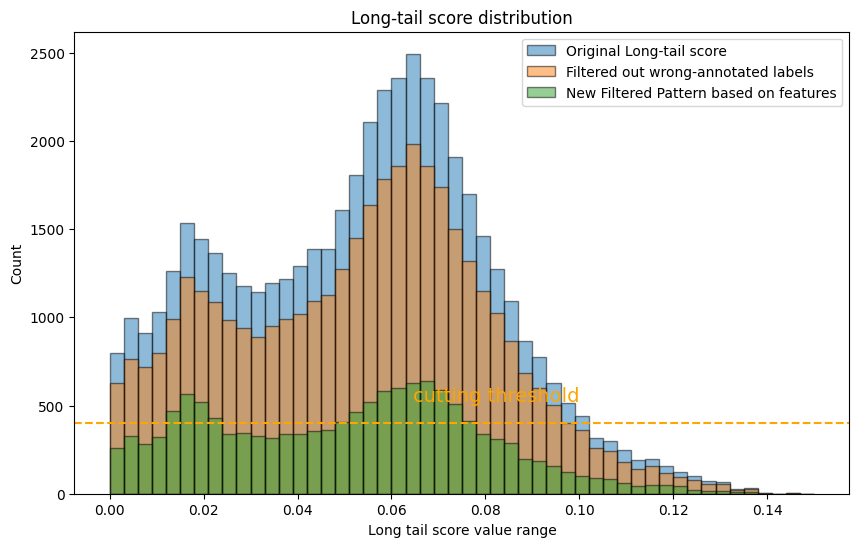

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import torch

dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"


## label curation reports
report_path = f"score_curation/results/tulu_{dataset_name}/tulu_{dataset_name}_report.pt"

reports = torch.load(report_path)
rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
rare_samples_orginal = [[sample[0], sample[1]] for sample in rare_samples] 

rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 

print(f"Size of the original samples with high quality: {len(rare_samples_orginal)}")
print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


long_tail_scores_filtered = np.array(rare_samples_filtered)[:,1]

long_tail_scores_orginal = np.array(rare_samples_orginal)[:,1]


# 定义区间边界
bins = np.arange(0, max(max(long_tail_scores_filtered), max(long_tail_scores_orginal)) + 0.003, 0.003)


counts, _ = np.histogram(long_tail_scores_filtered, bins)
threshold = 530   ## the random threshold for feature-wise
remaining_samples_indices = []
for i in range(len(bins) - 1):
    indices_in_bin = np.where((long_tail_scores_filtered >= bins[i]) & (long_tail_scores_filtered < bins[i+1]))[0]
    # if counts[i] > threshold:
    #     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]

    #     if len(high_quality_indices_in_bin) >= threshold:

    #         high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
    #     remaining_samples_indices.extend(high_quality_indices_in_bin)

    #     # else:
    #     #     print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)}")
    #     #     low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
    #     #     low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
    #     #     remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

    # else:
    #     remaining_samples_indices.extend(indices_in_bin)

    high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]
    remaining_samples_indices.extend(high_quality_indices_in_bin)


remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]

long_tail_scores_filtered_new = np.array(rare_samples_filtered)[remaining_samples_indices, 1]




# 绘制柱状图
plt.figure(figsize=(10, 6))

# 绘制 long_tail_scores_orginal 的直方图
plt.hist(long_tail_scores_orginal, bins, alpha=0.5, label='Original Long-tail score', edgecolor='black')

# 绘制 long_tail_scores_filtered 的直方图
plt.hist(long_tail_scores_filtered, bins, alpha=0.5, label='Filtered out wrong-annotated labels', edgecolor='black')

plt.hist(long_tail_scores_filtered_new, bins, alpha=0.5, label='New Filtered Pattern based on features', edgecolor='black')


# 添加标题和标签
plt.title('Long-tail score distribution')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

# 添加图例
plt.legend(loc='upper right')

# 在 y=300 添加一条线并标注为 threshold
threshold_value = 400  # 示例阈值，请根据实际情况修改
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

plt.show()




Size of the original samples with high quality: 6788
Size of the remaining samples with high quality: 6684
Size of the remaining samples with high quality: 6684


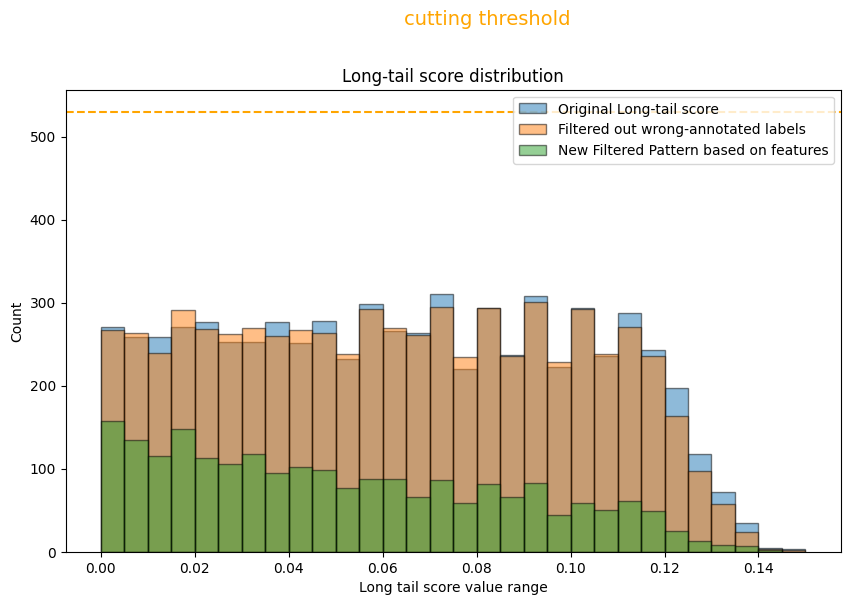

In [35]:
import numpy as np
import matplotlib.pyplot as plt

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
rare_samples_orginal = [[sample[0], sample[1]] for sample in rare_samples if sample[0] in set(remaining_samples_idx_2)] 

rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] in set(remaining_samples_idx_1)] 

print(f"Size of the original samples with high quality: {len(rare_samples_orginal)}")
print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


long_tail_scores_filtered = np.array(rare_samples_filtered)[:,1]

long_tail_scores_orginal = np.array(rare_samples_orginal)[:,1]


# 定义区间边界
bins = np.arange(0, max(max(long_tail_scores_filtered), max(long_tail_scores_orginal)) + 0.005, 0.005)


counts, _ = np.histogram(long_tail_scores_filtered, bins)
threshold = 530   ## the random threshold for feature-wise
remaining_samples_indices = []
for i in range(len(bins) - 1):
    indices_in_bin = np.where((long_tail_scores_filtered >= bins[i]) & (long_tail_scores_filtered < bins[i+1]))[0]
    # if counts[i] > threshold:
    #     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]

    #     if len(high_quality_indices_in_bin) >= threshold:

    #         high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
    #     remaining_samples_indices.extend(high_quality_indices_in_bin)

    #     # else:
    #     #     print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)}")
    #     #     low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
    #     #     low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
    #     #     remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

    # else:
    #     remaining_samples_indices.extend(indices_in_bin)

    high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 4]
    remaining_samples_indices.extend(high_quality_indices_in_bin)


remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]

long_tail_scores_filtered_new = np.array(rare_samples_filtered)[remaining_samples_indices, 1]




# 绘制柱状图
plt.figure(figsize=(10, 6))

# 绘制 long_tail_scores_orginal 的直方图
plt.hist(long_tail_scores_orginal, bins, alpha=0.5, label='Original Long-tail score', edgecolor='black')

# 绘制 long_tail_scores_filtered 的直方图
plt.hist(long_tail_scores_filtered, bins, alpha=0.5, label='Filtered out wrong-annotated labels', edgecolor='black')
plt.hist(long_tail_scores_filtered_new, bins, alpha=0.5, label='New Filtered Pattern based on features', edgecolor='black')

# 添加标题和标签
plt.title('Long-tail score distribution')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

# 添加图例
plt.legend(loc='upper right')

# 在 y=300 添加一条线并标注为 threshold
threshold_value = 530  # 示例阈值，请根据实际情况修改
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

plt.show()


## Plot the label infos within each bin

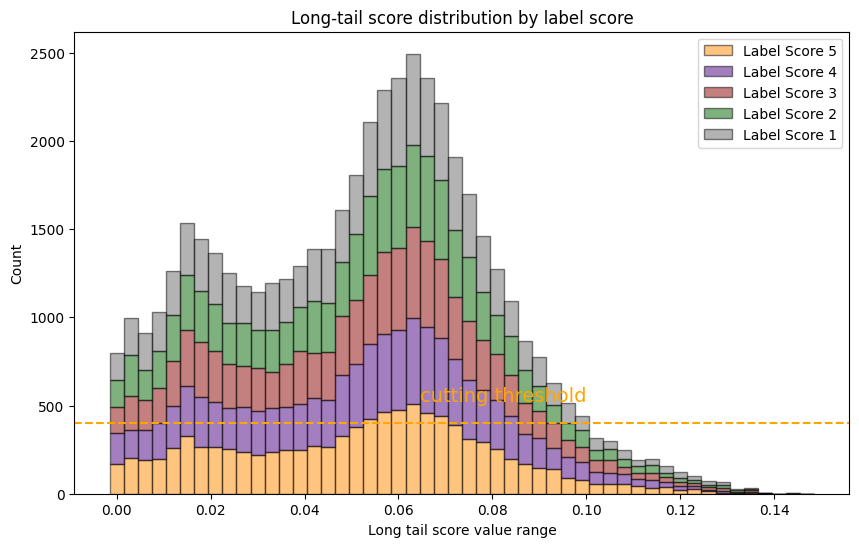

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# 假设 labels 是一个包含每个 rare_sample 对应的标签分数的字典
# 例如： labels = {index: score, ...}
labels = {sample[0]: np.random.randint(1, 6) for sample in rare_samples}  # 这里假设标签分数是 1-5 的整数，您可以替换为实际数据

# 处理 rare_samples 中的 long_tail_scores
long_tail_scores = np.array(rare_samples)[:,1]

# 定义区间边界
bins = np.arange(0, max(long_tail_scores) + 0.003, 0.003)

# 根据不同的标签分数进行分组
grouped_counts = {i: np.zeros(len(bins) - 1) for i in range(1, 6)}  # 假设标签分数在 1-5 之间
for i, score in enumerate(long_tail_scores):
    label = labels[rare_samples[i][0]]
    bin_index = np.digitize(score, bins) - 1  # 找到 score 所属的 bin
    grouped_counts[label][bin_index] += 1

# 绘制堆叠柱状图
plt.figure(figsize=(10, 6))

# 使用低对比度的颜色（降低透明度）
colors = ['darkorange', 'indigo', 'darkred', 'darkgreen', 'dimgray']
alphas = 0.5  # 透明度设置为 50%

# 绘制堆叠柱状图
bottom = np.zeros(len(bins) - 1)
for i in range(5, 0, -1):  # 反向迭代标签分数
    plt.bar(bins[:-1], grouped_counts[i], width=np.diff(bins), bottom=bottom, color=colors[5-i], edgecolor='black', alpha=alphas, label=f'Label Score {i}')
    bottom += grouped_counts[i]

# 添加标题和标签
plt.title('Long-tail score distribution by label score')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

# 添加图例
plt.legend(loc='upper right')

# 在 y=530 添加一条线并标注为 threshold
threshold_value = 400  # 示例阈值，请根据实际情况修改
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

plt.show()


## 3.*-2 Check the model-generated labels from different labeling models.

In [51]:
import torch
import numpy as np

# 确定数据集名称和模型名称
dataset_name = 'flan_v2'
model_names = ["meta/llama-3.1-8b-instruct", 'google/gemma-2-9b-it', "mistralai/mixtral-8x22b-instruct-v0.1"]

# 初始化用于存储所有标签的列表
all_labels = []

for model_name in model_names:
    # 构建root_path
    root_path = f"data/{model_name}/{dataset_name}/"
    
    # 加载标签
    labels = torch.load(root_path + "output_labels_revised.pt")
    
    # 将标签添加到all_labels列表中
    all_labels.append(labels)

# 将标签列表转换为n*3的NumPy数组
combined_labels = np.column_stack(all_labels)

print(combined_labels.shape)  # 输出数组的形状以确认其为n*3

# 查看数组的前几行
print(combined_labels[:5])


(49123, 3)
[[4 3 5]
 [2 3 5]
 [4 1 1]
 [2 3 5]
 [4 4 5]]


## 3.3 Create a random selection sampling method

In [6]:
import torch 
import random
import numpy as np
from datasets import load_dataset


dataset_name ='flan_v2'
model_name="meta/llama-3.1-8b-instruct"

root_path = f"data/{model_name}/{dataset_name}/"



# root_path ="score_curation/"


#full size
labels = torch.load(root_path + "output_labels_revised.pt")

#selected size
filtered_labels = torch.load(root_path + "filtered_output_labels.pt")

full_data_size = len(labels)
data_size = len(filtered_labels)
print(f"full data size: {full_data_size}; random selected size: {data_size}!!!")

random_samples_idx = random.sample(list(range(full_data_size)), data_size)



dataset_path = root_path + f"{dataset_name}.parquet"
data = load_dataset('parquet', data_files=dataset_path)
filtered_dialogs = data['train'].select(random_samples_idx)


output_json_path = root_path + f"random_dataset.json"  ## the json form is for funetunning
filtered_dialogs.to_json(output_json_path)


full data size: 49123; random selected size: 1208!!!


FileNotFoundError: Unable to find '/mnt/batch/tasks/shared/LS_root/mounts/clusters/jinlong-exp/code/Users/jinlong.pang/LADR_LLM_alignment_data_refinement/labeling/data/meta/llama-3.1-8b-instruct/flan_v2/flan_v2.parquet'

### 3.2 Plot the filtered feature-wise long tail score

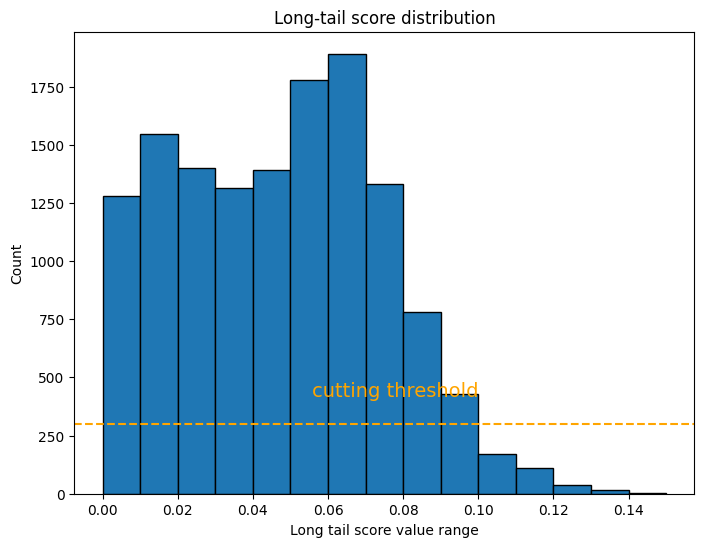

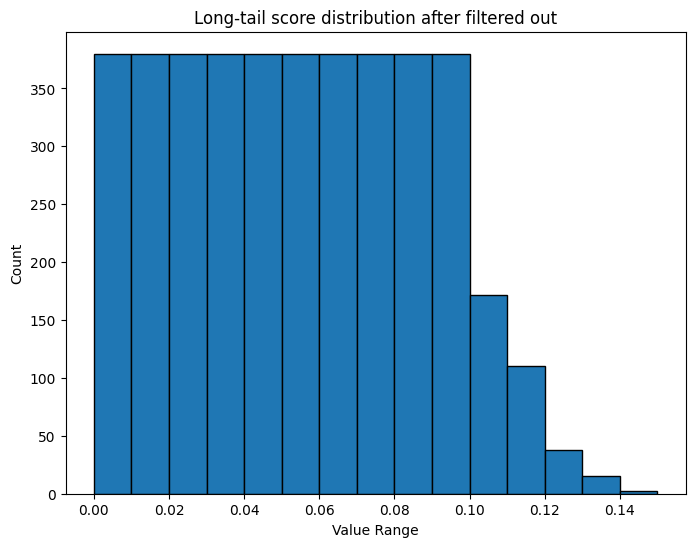

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# 提取 y 值
# long_tail_scores_filtered


# 示例数据
threshold_value = 300

# 定义区间边界
bins = np.arange(0, max(long_tail_scores)+0.01, 0.01)

# 计算每个区间的计数
counts, _ = np.histogram(long_tail_scores, bins)

# 绘制柱状图
plt.figure(figsize=(8, 6))
plt.hist(long_tail_scores, bins, edgecolor='black')

# 添加标题和标签
plt.title('Long-tail score distribution')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

# 在 y=300 添加一条线并标注为 threshold
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize = 14, ha='right', va='bottom')

# 显示图形
plt.show()


##################################################################################################################################################################

bins = np.arange(0, max(long_tail_scores_filtered)+0.01, 0.01)

# 计算每个区间的计数
counts, _ = np.histogram(long_tail_scores_filtered, bins)

# 绘制柱状图
plt.figure(figsize=(8, 6))
plt.hist(long_tail_scores_filtered, bins, edgecolor='black')

# 添加标题和标签
plt.title('Long-tail score distribution after filtered out')
plt.xlabel('Value Range')
plt.ylabel('Count')

# 显示图形
plt.show()

In [19]:
long_tail_scores_filtered

array([0.0027, 0.0055, 0.0085, ..., 0.2625, 0.2736, 0.281 ])

In [134]:

dataset_path = root_path + "data/tulu/filtered_flan_v2.parquet"
data = load_dataset('parquet', data_files=dataset_path)


Generating train split: 23672 examples [00:00, 31009.59 examples/s]


In [122]:
len(corrupted_samples_total)

7451

In [103]:
data = reports.detection['rare_example']


In [104]:
data = data[:len(data)//2]

In [88]:
assert len(reports.curation['label_curation']) == len(reports.detection['label_error'])

In [91]:
len(reports.detection['label_error'])

9369

## 4. Convert .Parquet to .Jsonl.gz form for datasets

In [15]:
import pandas as pd
import json
import gzip
import numpy as np


# 读取 .parquet 文件
parquet_file = 'data/tulu/flan_v2.parquet'
df = pd.read_parquet(parquet_file)

# 转换为 JSON lines 格式并保存为 .jsonl.gz 文件
jsonl_gz_file = 'data/tulu/flan_v2.jsonl.gz'
with gzip.open(jsonl_gz_file, 'wt', encoding='utf-8') as f:
    for record in df.to_dict(orient='records'):
        # 将 `messages` 列从 ndarray 转换为列表
        if isinstance(record['messages'], (pd.Series, pd.DataFrame, np.ndarray)):
            record['messages'] = record['messages'].tolist()
        f.write(json.dumps(record) + '\n')

print(f"Converted {parquet_file} to {jsonl_gz_file}")


Converted data/tulu/flan_v2.parquet to data/tulu/flan_v2.jsonl.gz


## 5 Generate dataset to evaluate the performance gap between high-rated samples and low-rated sample

In [6]:
import torch 
import random
import numpy as np
from datasets import load_dataset

## label curation reports
reports = torch.load("score_curation/results/tulu_flan_v2/tulu_flan_v2_report.pt")

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.75: #confidence prob;0.75
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path ="score_curation/"
labels = torch.load(root_path + "data/gemma/flan_v2/output_labels_revised.pt")

# for sample_label in cured_sample_labels:
#     labels[sample_label[0]] = sample_label[1]
# print(f"label size: {len(labels)}")

## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)

# 打印结果
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

### 从标签1和标签5中取样
label_1_indices = np.where(labels == 1)[0]
label_5_indices = np.where(labels == 5)[0]

# 确保有足够的样本数
num_samples = 1500
if len(label_1_indices) >= num_samples and len(label_5_indices) >= num_samples:
    selected_label_1_samples = random.sample(list(label_1_indices), num_samples)
    selected_label_5_samples = random.sample(list(label_5_indices), num_samples)
else:
    print("Not enough samples in one of the labels.")

print(f"Selected {len(selected_label_1_samples)} samples from label 1.")
print(f"Selected {len(selected_label_5_samples)} samples from label 5.")

# 处理 selected_label_1_samples 和 selected_label_5_samples


dataset_name = 'flan_v2'

data_path = './data_refine/tulu_split_parquet/'

dataset_path = data_path + f"{dataset_name}.parquet"
data = load_dataset('parquet', data_files=dataset_path)
output_json_path_1 = root_path + "data/gemma/flan_v2/label_1_1500samples.json"
output_json_path_5 = root_path + "data/gemma/flan_v2/label_5_1500samples.json"

label_1_dialogs = data['train'].select(selected_label_1_samples)
label_1_dialogs.to_json(output_json_path_1)


label_5_dialogs = data['train'].select(selected_label_5_samples)
label_5_dialogs.to_json(output_json_path_5)



/home/azureuser/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_40411/1047514123.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_o

==== Docta: Doctor for your data. Current version: 0.2 ====
cured sample size: 1765
corrupted_samples_total: 7402
Label: 0, Count: 5215
Label: 1, Count: 1858
Label: 2, Count: 8806
Label: 3, Count: 22345
Label: 4, Count: 1427
Label: 5, Count: 9472
Selected 1500 samples from label 1.
Selected 1500 samples from label 5.


/tmp/ipykernel_40411/1047514123.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load(root_path + "data/gemma/flan_v2/output_labels_revised.pt")
Creating 

3594829

In [17]:
import json

root_path ="score_curation/"

# 从文件中逐行读取并提取content字段
def read_samples_content(file_path, num_samples=1):
    samples = []
    with open(file_path, 'r') as file:
        for line in file:
            if len(samples) < num_samples:
                data = json.loads(line)
                for message in data['messages']:
                    samples.append(message['content'])
            else:
                break
    return samples

# 文件路径
output_json_path_1 = root_path + "data/gemma/flan_v2/label_1_1500samples.json"
output_json_path_5 = root_path + "data/gemma/flan_v2/label_5_1500samples.json"

# 读取数据
contents_label_1 = read_samples_content(output_json_path_1)
contents_label_5 = read_samples_content(output_json_path_5)

# 打印content字段
print("Contents from label 1:")
for content in contents_label_1:
    print('#'*100)
    print(content)
    # if ("street" in content or "avenue" in content) and 'match' in content:
    #     print(content)
    #     break
print('@'*150)
print("\nContents from label 5:")
for content in contents_label_5:
    print('#'*100)
    print(content)



Contents from label 1:
Premise & hypothesis: Is the premise "Business attired man having a shoeshine on a busy street." true if "A businessman is walking on the street."?
A: no

Premise & hypothesis: Is the premise "A man in midair about to land on a snowboard." true if "the man is really tired"?
A: it is not possible to tell

Premise & hypothesis: Is the premise "A referee indicating the winner of a wrestling match." true if "there is a sport being played"?
A: yes

Premise & hypothesis: Is the premise "A woman and a young girl in a purple jacket are looking at sweets in a shop." true if "Two boys in red are dancing."?
A:
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


'Premise & hypothesis: Is the premise "Business attired man having a shoeshine on a busy street." true if "A businessman is walking on the street."?\nA: no\n\nPremise & hypothesis: Is the premise "A man in midair about to land on a snowboard." true if "the man is really tired"?\nA: it is not possible to tell\n\nPremise & hypothesis: Is the premise "A referee indicating the winner of a wrestling match." true if "there is a sport being played"?\nA: yes\n\nPremise & hypothesis: Is the premise "A woman and a young girl in a purple jacket are looking at sweets in a shop." true if "Two boys in red are dancing."?\nA:'

In [3]:
import torch 
import random
import numpy as np
from datasets import load_dataset
from collections import Counter

random.seed(3)

dataset_name ='all_train'
model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
dataset_size = 2500

# label curation reports
report_path = f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt"
reports = torch.load(report_path)

# Part 1 (label-wise): label curation
corrupted_samples = [x[0] for x in reports.detection['label_error']]

cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']:  # (idx, label, confidence)
    if sample[2] >= 1:  # confidence prob
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))

print(f"Cured sample size: {len(cured_sample_labels)}")

# Filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"Corrupted samples total: {len(corrupted_samples_total)}")

# Change the original labels to the suggested label
root_path = f"./model_finetune_cluster/new_train_data/{model_name}/{dataset_name}/"
labels = torch.load(root_path + "output_labels_revised.pt")

print(f"Original Counter(labels): {Counter(labels)}")

for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]

print(f"Label size: {len(labels)}")
print(f"Revised Counter(labels): {Counter(labels)}")

# Filter out the low-quality samples
label_wise_filter_out_samples = set(corrupted_samples_total)
print(f"Label-wise filter out samples: {len(label_wise_filter_out_samples)}")

# Part 2 (feature-wise): handle the rare example
rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example']) // 2]
rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples]

print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")

filtered_indices = []

for target_label in [5, 4, 3, 2, 1]:
    if len(filtered_indices) >= dataset_size:
        break

    label_indices = [idx for idx in range(len(labels)) if labels[idx] == target_label]

    if dataset_size - len(filtered_indices) > len(label_indices):
        filtered_indices.extend(label_indices)
    else:
        rated_samples = [[sample[0], sample[1]] for sample in rare_samples if sample[0] in set(label_indices)]

        remain_data_size = dataset_size - len(filtered_indices)

        if rated_samples:  # 确保 rated_samples 不为空
            sorted_samples = sorted(rated_samples, key=lambda x: x[1], reverse=True)[:remain_data_size]
            sorted_samples_indices = np.array(sorted_samples)[:, 0].astype(int)
            filtered_indices.extend(sorted_samples_indices)

    print("Size of the filtered dataset:", len(filtered_indices))

# Filter out the corrupted samples and reconstruct the dataset
data = load_dataset('json', data_files=root_path + 'full_dataset.json')

# 根据 filtered_indices 选择样本
filtered_dialogs = data['train'].select(filtered_indices)

# 保存过滤后的数据集
filtered_dialogs.to_json(root_path + f"filtered-{dataset_size//1000}k_dataset.json")


Cured sample size: 0
Corrupted samples total: 190136
Original Counter(labels): Counter({3: 116114, 4: 57669, 2: 48254, 1: 47402, 0: 27386, 5: 4107})
Label size: 300932
Revised Counter(labels): Counter({3: 116114, 4: 57669, 2: 48254, 1: 47402, 0: 27386, 5: 4107})
Label-wise filter out samples: 190136
Size of the remaining samples with high quality: 300932
Size of the filtered dataset: 2500


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 38.77ba/s]


7605900

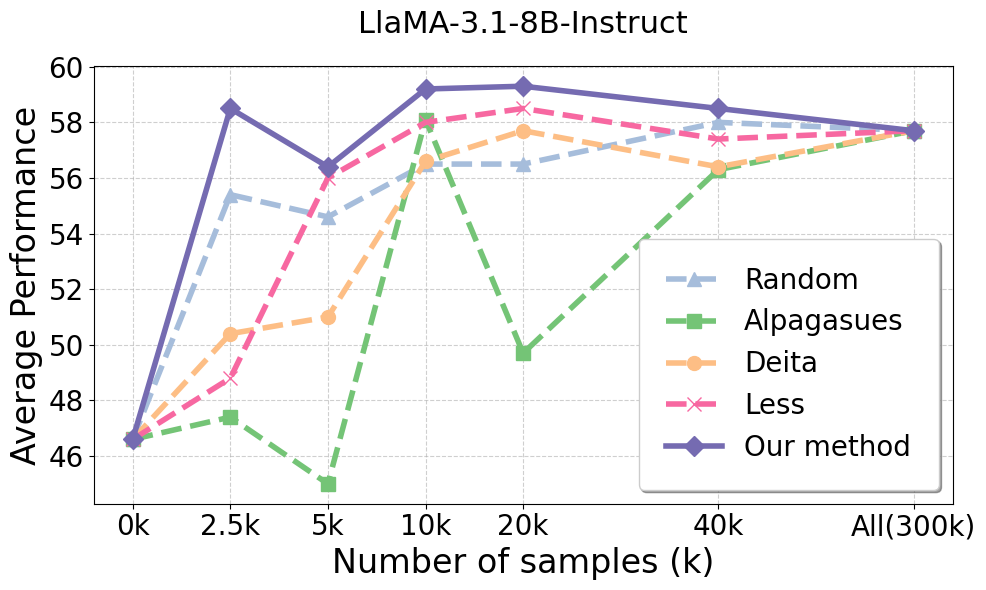

In [4]:
import matplotlib.pyplot as plt

# 示例数据

### labeling model: meta-llama-3.1b-instruct

random_results = [46.6, 55.4, 54.6, 56.5, 56.5, 58.0, 57.7]
label_filtered_results = [46.6, 47.4, 45.0, 58.1, 49.7,  56.3, 57.7]
diversity_filtered_results = [46.6, 50.4, 51.0, 56.6, 57.7, 56.4, 57.7]
less_results = [46.6, 48.8, 56.0, 58.0, 58.5, 57.4, 57.7]
filtered_results = [46.6, 58.5, 56.4, 59.2, 59.3, 58.5, 57.7]

# x 轴数据
x = [0, 5, 10, 15, 20, 30, 40]

# 设置画布大小
plt.figure(figsize=(10, 6))

# 绘制多条曲线，增加线宽和颜色，设定样式
plt.plot(x, random_results, marker='^', label='Random', linewidth=2, color='#a6bddb', linestyle='--', markersize=8)
plt.plot(x, label_filtered_results, marker='s', label='Alpagasues', linewidth=2, color='#74c476', linestyle='--', markersize=8)
plt.plot(x, diversity_filtered_results, marker='o', label='Deita', linewidth=2, color='#fdbe85', linestyle='--', markersize=8)
plt.plot(x, less_results, marker='x', label='Less', linewidth=2, color='#f768a1', linestyle='--', markersize=8)  
plt.plot(x, filtered_results, marker='D', label='Our method', linewidth=2, color='#756bb1', linestyle='-', markersize=8)

# 添加标题和轴标签，设置字体大小
plt.title('LlaMA-3.1-8B-Instruct', fontsize=22, pad=24)
plt.xlabel('Number of samples (k)', fontsize=24)
plt.ylabel('Average Performance', fontsize=24)

# 自定义 x 轴刻度，并添加 'k' 单位，增大字体
plt.xticks(x, ['0k', '2.5k', '5k', '10k', '20k', '40k', 'All(300k)'], fontsize=20)
plt.yticks(fontsize=20)

# 显示网格线，调低透明度以美化
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# 调整图例位置、大小和样式
plt.legend(loc='lower right', fontsize=20, frameon=True, fancybox=True, shadow=True, borderpad=1)

# 去除图表周围不必要的边框，使其更干净
plt.tight_layout()

# 显示图像
plt.show()


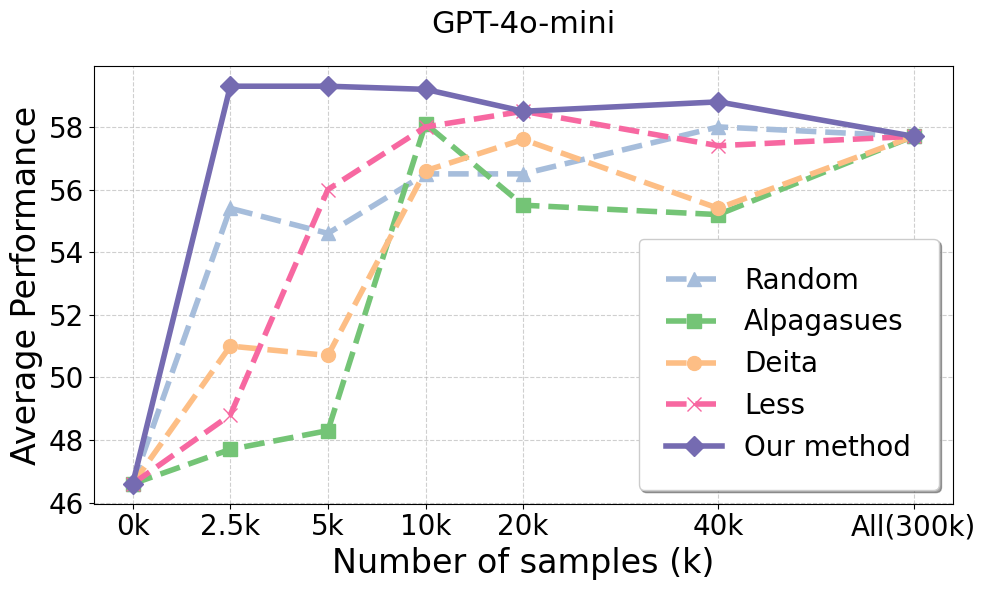

In [2]:
import matplotlib.pyplot as plt

# 示例数据

### labeling model: gpt-4o-mini

random_results = [46.6, 55.4, 54.6, 56.5, 56.5, 58.0, 57.7]
less_results = [46.6, 48.8, 56.0, 58.0, 58.5, 57.4, 57.7]

label_filtered_results = [46.6, 47.7, 48.3, 58.1, 55.5, 55.2, 57.7]
diversity_filtered_results = [46.6, 51.0, 50.7, 56.6, 57.6, 55.4, 57.7]
filtered_results = [46.6, 59.3, 59.3, 59.2, 58.5, 58.8, 57.7]

# x 轴数据
x = [0, 5, 10, 15, 20, 30, 40]

# 设置画布大小
plt.figure(figsize=(10, 6))

# 绘制多条曲线，增加线宽和颜色，设定样式
plt.plot(x, random_results, marker='^', label='Random', linewidth=2, color='#a6bddb', linestyle='--', markersize=8)
plt.plot(x, label_filtered_results, marker='s', label='Alpagasues', linewidth=2, color='#74c476', linestyle='--', markersize=8)
plt.plot(x, diversity_filtered_results, marker='o', label='Deita', linewidth=2, color='#fdbe85', linestyle='--', markersize=8)
plt.plot(x, less_results, marker='x', label='Less', linewidth=2, color='#f768a1', linestyle='--', markersize=8)  
plt.plot(x, filtered_results, marker='D', label='Our method', linewidth=2, color='#756bb1', linestyle='-', markersize=8)

# 添加标题和轴标签，设置字体大小
plt.title('GPT-4o-mini', fontsize=22, pad=24)
plt.xlabel('Number of samples (k)', fontsize=24)
plt.ylabel('Average Performance', fontsize=24)

# 自定义 x 轴刻度，并添加 'k' 单位，增大字体
plt.xticks(x, ['0k', '2.5k', '5k', '10k', '20k', '40k', 'All(300k)'], fontsize=20)
plt.yticks(fontsize=20)

# 显示网格线，调低透明度以美化
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# 调整图例位置、大小和样式
plt.legend(loc='lower right', fontsize=20, frameon=True, fancybox=True, shadow=True, borderpad=1)

# 去除图表周围不必要的边框，使其更干净
plt.tight_layout()

# 显示图像
plt.show()


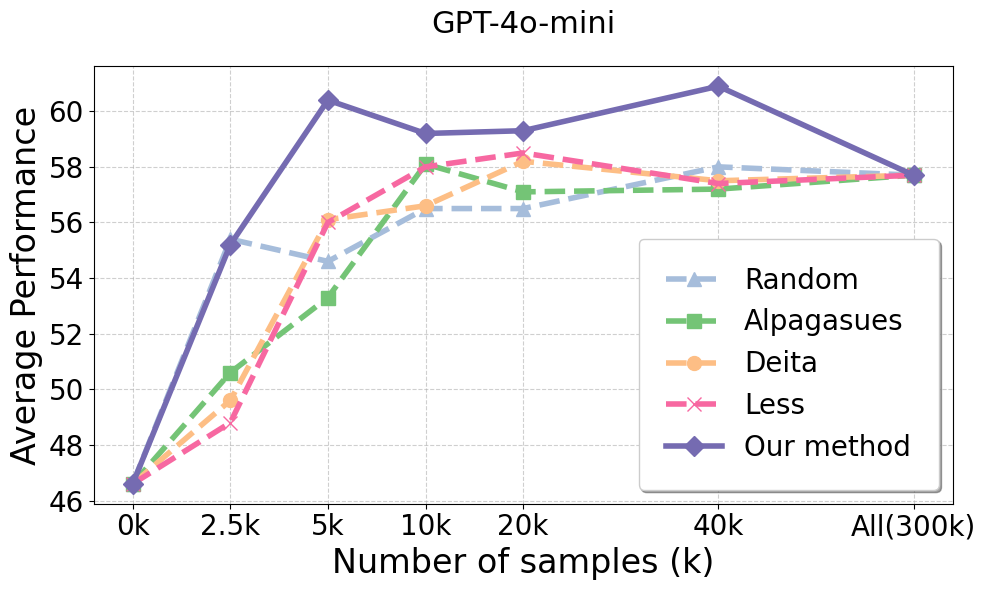

In [1]:
import matplotlib.pyplot as plt

# 示例数据

### labeling model: mistral-7b-v0.3

random_results = [46.6, 55.4, 54.6, 56.5, 56.5, 58.0, 57.7]
less_results = [46.6, 48.8, 56.0, 58.0, 58.5, 57.4, 57.7]



label_filtered_results = [46.6, 50.6, 53.3, 58.1, 57.1, 57.2, 57.7]
diversity_filtered_results = [46.6, 49.6, 56.1, 56.6, 58.2, 57.5, 57.7]
filtered_results = [46.6, 55.2, 60.4, 59.2, 59.3, 60.9, 57.7]

# x 轴数据
x = [0, 5, 10, 15, 20, 30, 40]

# 设置画布大小
plt.figure(figsize=(10, 6))

# 绘制多条曲线，增加线宽和颜色，设定样式
plt.plot(x, random_results, marker='^', label='Random', linewidth=3, color='#a6bddb', linestyle='--', markersize=8)
plt.plot(x, label_filtered_results, marker='s', label='Alpagasues', linewidth=3, color='#74c476', linestyle='--', markersize=8)
plt.plot(x, diversity_filtered_results, marker='o', label='Deita', linewidth=3, color='#fdbe85', linestyle='--', markersize=8)
plt.plot(x, less_results, marker='x', label='Less', linewidth=3, color='#f768a1', linestyle='--', markersize=8)  
plt.plot(x, filtered_results, marker='D', label='Our method', linewidth=3, color='#756bb1', linestyle='-', markersize=8)

# 添加标题和轴标签，设置字体大小
plt.title('Mistral-7B-v0.3', fontsize=22, pad=24)
plt.xlabel('Number of samples (k)', fontsize=24)
plt.ylabel('Average Performance', fontsize=24)

# 自定义 x 轴刻度，并添加 'k' 单位，增大字体
plt.xticks(x, ['0k', '2.5k', '5k', '10k', '20k', '40k', 'All(300k)'], fontsize=20)
plt.yticks(fontsize=20)

# 显示网格线，调低透明度以美化
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# 调整图例位置、大小和样式
plt.legend(loc='lower right', fontsize=20, frameon=True, fancybox=True, shadow=True, borderpad=1)

# 去除图表周围不必要的边框，使其更干净
plt.tight_layout()

# 显示图像
plt.show()


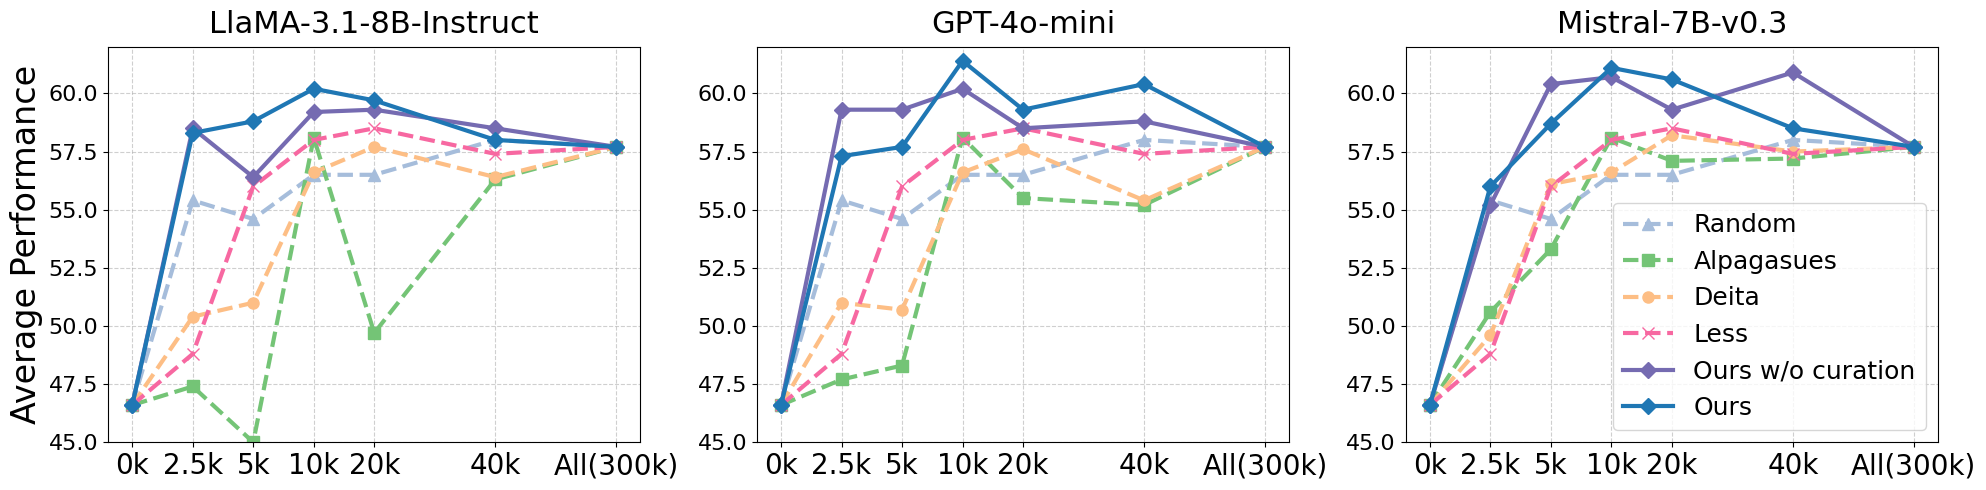

In [1]:
import matplotlib.pyplot as plt

# 示例数据
x = [0, 5, 10, 15, 20, 30, 40]
xticks_labels = ['0k', '2.5k', '5k', '10k', '20k', '40k', 'All(300k)']

# LlaMA-3.1-8B-Instruct
random_results_llama = [46.6, 55.4, 54.6, 56.5, 56.5, 58.0, 57.7]
label_filtered_results_llama = [46.6, 47.4, 45.0, 58.1, 49.7,  56.3, 57.7]
diversity_filtered_results_llama = [46.6, 50.4, 51.0, 56.6, 57.7, 56.4, 57.7]
less_results_llama = [46.6, 48.8, 56.0, 58.0, 58.5, 57.4, 57.7]

filtered_results_llama = [46.6, 58.5, 56.4, 59.2, 59.3, 58.5, 57.7]

filtered_cured_results_llama = [46.6, 58.3, 58.8, 60.2, 59.7, 58.0, 57.7]

# GPT-4o-mini
random_results_gpt = [46.6, 55.4, 54.6, 56.5, 56.5, 58.0, 57.7]
label_filtered_results_gpt = [46.6, 47.7, 48.3, 58.1, 55.5, 55.2, 57.7]
diversity_filtered_results_gpt = [46.6, 51.0, 50.7, 56.6, 57.6, 55.4, 57.7]
less_results_gpt = [46.6, 48.8, 56.0, 58.0, 58.5, 57.4, 57.7]

filtered_results_gpt = [46.6, 59.3, 59.3, 60.2, 58.5, 58.8, 57.7]

filtered_cured_results_gpt = [46.6, 57.3, 57.7, 61.4, 59.3, 60.4, 57.7]


# Mistral-7B-v0.3
random_results_mistral = [46.6, 55.4, 54.6, 56.5, 56.5, 58.0, 57.7]
label_filtered_results_mistral = [46.6, 50.6, 53.3, 58.1, 57.1, 57.2, 57.7]
diversity_filtered_results_mistral = [46.6, 49.6, 56.1, 56.6, 58.2, 57.5, 57.7]
less_results_mistral = [46.6, 48.8, 56.0, 58.0, 58.5, 57.4, 57.7]

filtered_results_mistral = [46.6, 55.2, 60.4, 60.7, 59.3, 60.9, 57.7]
filtered_cured_results_mistral = [46.6, 56.0, 58.7, 61.1, 60.6, 58.5, 57.7]


# 创建 1x3 子图
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 绘制 LlaMA-3.1-8B-Instruct 的图
axes[0].plot(x, random_results_llama, marker='^', label='Random', linewidth=3, color='#a6bddb', linestyle='--', markersize=8)
axes[0].plot(x, label_filtered_results_llama, marker='s', label='Alpagasues', linewidth=3, color='#74c476', linestyle='--', markersize=8)
axes[0].plot(x, diversity_filtered_results_llama, marker='o', label='Deita', linewidth=3, color='#fdbe85', linestyle='--', markersize=8)
axes[0].plot(x, less_results_llama, marker='x', label='Less', linewidth=3, color='#f768a1', linestyle='--', markersize=8)
axes[0].plot(x, filtered_results_llama, marker='D', label='Our method', linewidth=3, color='#756bb1', linestyle='-', markersize=8)

axes[0].plot(x, filtered_cured_results_llama, marker='D', label='Label cured', linewidth=3, color='#1f77b4', linestyle='-', markersize=8) 

axes[0].set_title('LlaMA-3.1-8B-Instruct', fontsize=22, pad=10)
# axes[0].set_xlabel('Number of samples (k)', fontsize=16)
axes[0].set_ylabel('Average Performance', fontsize=24)
axes[0].set_xticks(x)
axes[0].set_xticklabels(xticks_labels, fontsize=20)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].set_ylim(45, 62)  # 设置Y轴范围

axes[0].grid(True, which='both', linestyle='--', alpha=0.6)
# axes[0].legend(loc='lower right', fontsize=16)

# 绘制 GPT-4o-mini 的图
axes[1].plot(x, random_results_gpt, marker='^', label='Random', linewidth=3, color='#a6bddb', linestyle='--', markersize=8)
axes[1].plot(x, label_filtered_results_gpt, marker='s', label='Alpagasues', linewidth=3, color='#74c476', linestyle='--', markersize=8)
axes[1].plot(x, diversity_filtered_results_gpt, marker='o', label='Deita', linewidth=3, color='#fdbe85', linestyle='--', markersize=8)
axes[1].plot(x, less_results_gpt, marker='x', label='Less', linewidth=3, color='#f768a1', linestyle='--', markersize=8)
axes[1].plot(x, filtered_results_gpt, marker='D', label='Our method', linewidth=3, color='#756bb1', linestyle='-', markersize=8)

axes[1].plot(x, filtered_cured_results_gpt, marker='D', label='Label cured', linewidth=3, color='#1f77b4', linestyle='-', markersize=8)

axes[1].set_title('GPT-4o-mini', fontsize=22, pad=10)
# axes[1].set_xlabel('Number of samples (k)', fontsize=16)
# axes[1].set_ylabel('Average Performance', fontsize=16)
axes[1].set_xticks(x)
axes[1].set_xticklabels(xticks_labels, fontsize=20)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_ylim(45, 62)  # 设置Y轴范围

axes[1].grid(True, which='both', linestyle='--', alpha=0.6)
# axes[1].legend(loc='lower right', fontsize=16)

# 绘制 Mistral-7B-v0.3 的图
axes[2].plot(x, random_results_mistral, marker='^', label='Random', linewidth=3, color='#a6bddb', linestyle='--', markersize=8)
axes[2].plot(x, label_filtered_results_mistral, marker='s', label='Alpagasues', linewidth=3, color='#74c476', linestyle='--', markersize=8)
axes[2].plot(x, diversity_filtered_results_mistral, marker='o', label='Deita', linewidth=3, color='#fdbe85', linestyle='--', markersize=8)
axes[2].plot(x, less_results_mistral, marker='x', label='Less', linewidth=3, color='#f768a1', linestyle='--', markersize=8)
axes[2].plot(x, filtered_results_mistral, marker='D', label='Ours w/o curation', linewidth=3, color='#756bb1', linestyle='-', markersize=8)

axes[2].plot(x, filtered_cured_results_mistral, marker='D', label='Ours', linewidth=3, color='#1f77b4', linestyle='-', markersize=8)

axes[2].set_title('Mistral-7B-v0.3', fontsize=22, pad=10)
# axes[2].set_xlabel('Number of samples (k)', fontsize=16)
# axes[2].set_ylabel('Average Performance', fontsize=16)
axes[2].set_xticks(x)
axes[2].set_xticklabels(xticks_labels, fontsize=20)
axes[2].tick_params(axis='y', labelsize=16)
axes[2].grid(True, which='both', linestyle='--', alpha=0.6)
axes[2].legend(loc='lower right', fontsize=18)
axes[2].set_ylim(45, 62)  # 设置Y轴范围

# 调整布局以防止重叠
plt.tight_layout()

# 显示图像
plt.show()



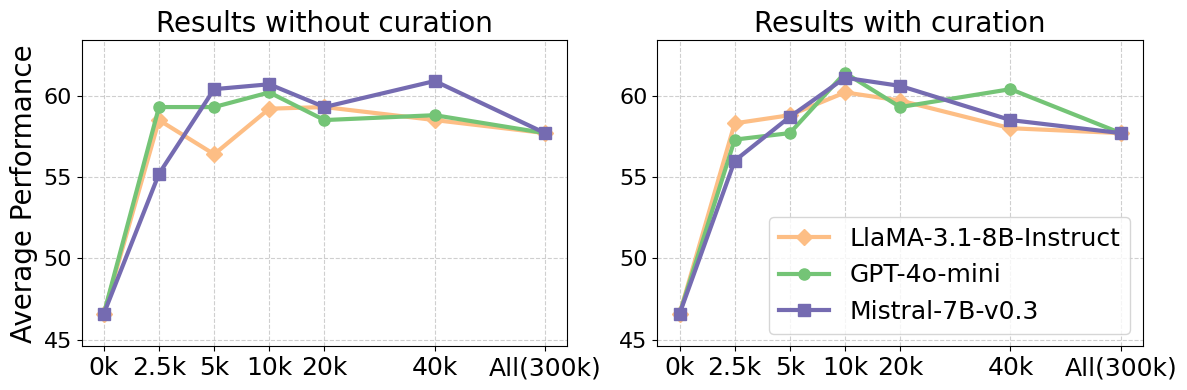

In [7]:
import matplotlib.pyplot as plt

# 示例数据
x = [0, 5, 10, 15, 20, 30, 40]
xticks_labels = ['0k', '2.5k', '5k', '10k', '20k', '40k', 'All(300k)']

# 结果数据
filtered_results_llama = [46.6, 58.5, 56.4, 59.2, 59.3, 58.5, 57.7]
filtered_cured_results_llama = [46.6, 58.3, 58.8, 60.2, 59.7, 58.0, 57.7]

filtered_results_gpt = [46.6, 59.3, 59.3, 60.2, 58.5, 58.8, 57.7]
filtered_cured_results_gpt = [46.6, 57.3, 57.7, 61.4, 59.3, 60.4, 57.7]

filtered_results_mistral = [46.6, 55.2, 60.4, 60.7, 59.3, 60.9, 57.7]
filtered_cured_results_mistral = [46.6, 56.0, 58.7, 61.1, 60.6, 58.5, 57.7]

# 创建 1x2 子图
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

y_min = min(min(filtered_results_llama), min(filtered_results_gpt), min(filtered_results_mistral),
            min(filtered_cured_results_llama), min(filtered_cured_results_gpt), min(filtered_cured_results_mistral)) - 2
y_max = max(max(filtered_results_llama), max(filtered_results_gpt), max(filtered_results_mistral),
            max(filtered_cured_results_llama), max(filtered_cured_results_gpt), max(filtered_cured_results_mistral)) + 2


# 绘制所有模型未进行标签修正的结果
axes[0].plot(x, filtered_results_llama, marker='D', label='LlaMA-3.1-8B-Instruct', color='#fdbe85', linewidth=3, linestyle='-', markersize=8)
axes[0].plot(x, filtered_results_gpt, marker='o', label='GPT-4o-mini', color='#74c476', linewidth=3, linestyle='-', markersize=8)
axes[0].plot(x, filtered_results_mistral, marker='s', label='Mistral-7B-v0.3', color='#756bb1', linewidth=3, linestyle='-', markersize=8)

axes[0].set_title('Results without curation', fontsize=20)
axes[0].set_ylabel('Average Performance', fontsize=20)
axes[0].set_xticks(x)
axes[0].set_xticklabels(xticks_labels, fontsize=18)
axes[0].grid(True, which='both', linestyle='--', alpha=0.6)
axes[0].set_ylim(y_min, y_max)  # 设置Y轴范围

# axes[0].legend(loc='lower right', fontsize=18)
axes[0].tick_params(axis='y', labelsize=16)

# 绘制所有模型进行标签修正的结果
axes[1].plot(x, filtered_cured_results_llama, marker='D', label='LlaMA-3.1-8B-Instruct', color='#fdbe85', linewidth=3, linestyle='-', markersize=8)
axes[1].plot(x, filtered_cured_results_gpt, marker='o', label='GPT-4o-mini', color='#74c476', linewidth=3, linestyle='-', markersize=8)
axes[1].plot(x, filtered_cured_results_mistral, marker='s', label='Mistral-7B-v0.3', color='#756bb1',  linewidth=3, linestyle='-', markersize=8)

axes[1].set_title('Results with curation', fontsize=20)
axes[1].set_xticks(x)
axes[1].set_xticklabels(xticks_labels, fontsize=18)
axes[1].grid(True, which='both', linestyle='--', alpha=0.6)
axes[1].legend(loc='lower right', fontsize=18)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_ylim(y_min, y_max)  # 设置Y轴范围

# 调整布局以防止重叠
plt.tight_layout()

# 显示图像
plt.show()
